In [1]:
import pandas as pd

df = pd.read_csv(r"E:\DataSet\Telco data churn\Telco-Customer-Churn.csv")

# View nulls
df.isnull().sum()

# Clean 'TotalCharges' (some values are empty strings)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(inplace=True)

# Remove duplicates (if any)
df.drop_duplicates(inplace=True)

# Convert SeniorCitizen from 0/1 to Yes/No
df['SeniorCitizen'] = df['SeniorCitizen'].replace({1: 'Yes', 0: 'No'})

<Axes: xlabel='Churn', ylabel='count'>

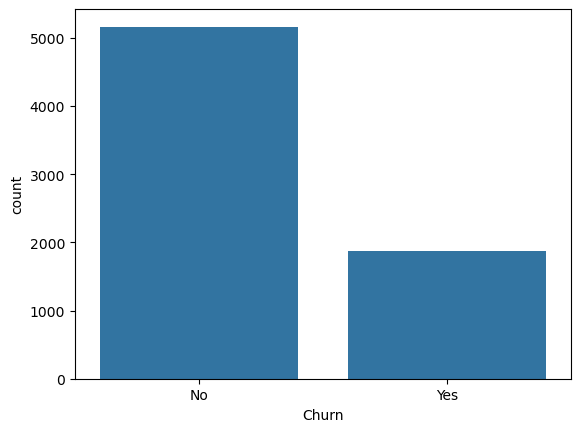

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Churn count
sns.countplot(x='Churn', data=df)


<Axes: xlabel='Contract', ylabel='count'>

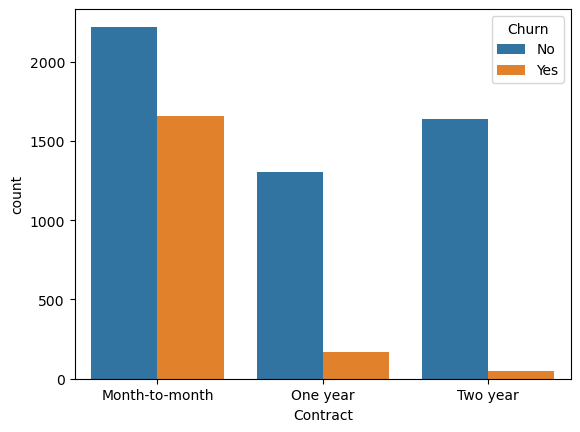

In [3]:
# Churn by contract type
sns.countplot(x='Contract', hue='Churn', data=df)

<Axes: xlabel='Churn', ylabel='MonthlyCharges'>

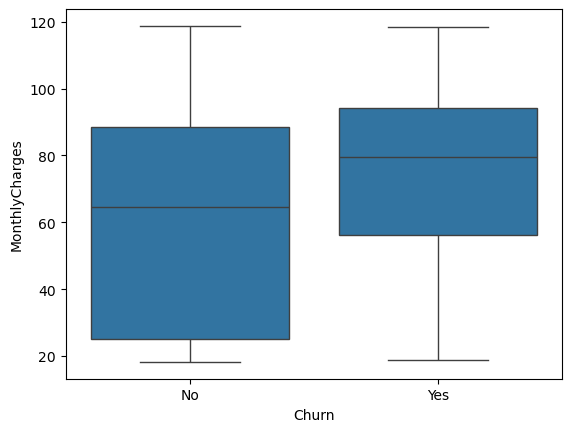

In [4]:
# MonthlyCharges vs Churn
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)

<Axes: xlabel='tenure', ylabel='Count'>

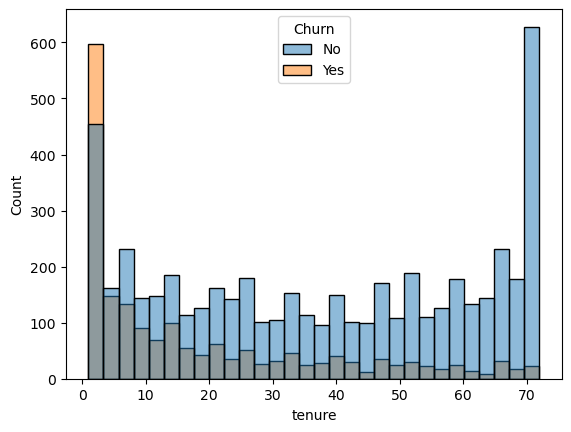

In [5]:
# Tenure distribution by Churn
sns.histplot(data=df, x='tenure', hue='Churn', bins=30)

<Axes: xlabel='count', ylabel='PaymentMethod'>

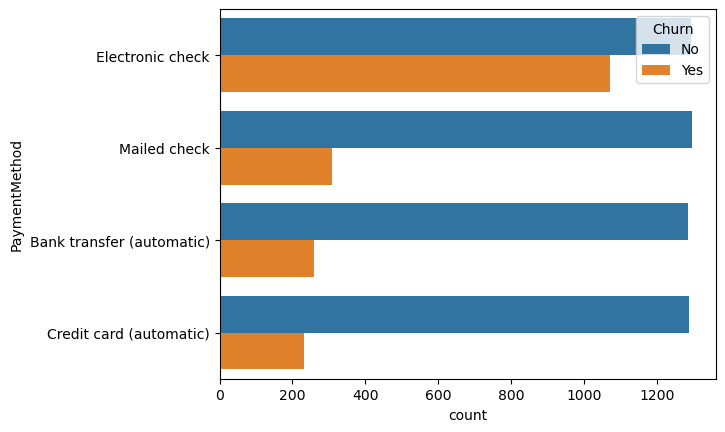

In [6]:
# Churn by PaymentMethod
sns.countplot(y='PaymentMethod', hue='Churn', data=df)

C:\Users\Kaushal\AppData\Local\Temp\ipykernel_10580\32125284.py:8: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = df.pivot_table(index='TenureGroup', columns='ChargeGroup', values='Churn', aggfunc=lambda x: (x=='Yes').mean())


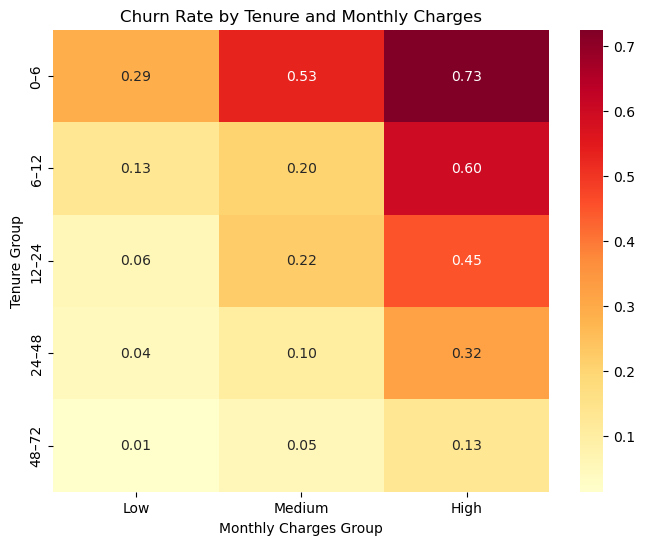

In [7]:
import matplotlib.pyplot as plt

# Bin tenure and monthly charges
df['TenureGroup'] = pd.cut(df['tenure'], bins=[0, 6, 12, 24, 48, 72], labels=["0–6", "6–12", "12–24", "24–48", "48–72"])
df['ChargeGroup'] = pd.cut(df['MonthlyCharges'], bins=[0, 35, 70, 105], labels=["Low", "Medium", "High"])

# Create a pivot table of churn rate
pivot = df.pivot_table(index='TenureGroup', columns='ChargeGroup', values='Churn', aggfunc=lambda x: (x=='Yes').mean())

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(pivot, annot=True, cmap='YlOrRd', fmt=".2f")
plt.title('Churn Rate by Tenure and Monthly Charges')
plt.ylabel('Tenure Group')
plt.xlabel('Monthly Charges Group')
plt.show()

In [ ]:
#Business Recommendations

    #Offer loyalty discounts or incentives for month-to-month users to switch to longer-term contracts.

    #Create targeted retention campaigns for high-risk groups (e.g. short tenure, high monthly charges).

    #Encourage customers to switch to digital payment methods and reduce PaperlessBilling churn risk.

    #Improve technical support and online security for fiber optic users.

# "Our analysis reveals that customers with short tenure and high monthly charges have the highest churn rate
#  indicating pricing pressure and early dissatisfaction. Conversely, long-tenure and lower-charge customers 
#  are the most loyal. These insights suggest retention efforts should focus on early-stage, high-spending customers
#  by offering onboarding incentives and perceived value boosts."